In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
tickers = ['^TNX', 'GLD', 'CL=F', 'ZF=F', 'ZL=F', 'CT=F', 'ARION.IC', 'EIK.IC', 'FESTI.IC', 'EIM.IC', 'AMRQ.L', 'BRIM.IC', 'SJOVA.IC', 'HAGA.IC']
spy_ticker = 'SPY'

start_date = '2021-01-01'
end_date = '2024-12-31'

In [3]:
df = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
spy_df = yf.download(spy_ticker, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  14 of 14 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
daily_returns = df.pct_change().dropna()
spy_daily_returns = spy_df.pct_change().dropna()

/var/folders/nm/qtdl4w8s71x9hxyd6g7xdhkw0000gn/T/ipykernel_20386/3973340781.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = df.pct_change().dropna()


In [47]:
cov_matrix = daily_returns.cov() * 252
volatility = daily_returns.std()
inverse_volatility_weights = 1 / volatility
inverse_volatility_weights /= inverse_volatility_weights.sum()
annualized_portfolio_volatility = np.sqrt(np.dot(inverse_volatility_weights.T, np.dot(cov_matrix, inverse_volatility_weights)))
marginal_risk_contribution = np.dot(cov_matrix, inverse_volatility_weights)
risk_contribution = inverse_volatility_weights * marginal_risk_contribution

In [63]:
expected_return = np.dot(inverse_volatility_weights, daily_returns.mean() * 252)
portfolio_volatility = np.sqrt(np.dot(inverse_volatility_weights.T, np.dot(cov_matrix, inverse_volatility_weights)))
print("Weights:")
print(inverse_volatility_weights)
print('-')
print(f"Portfolio expected returns: {expected_return:.2%}")
print(f"Portfolio volatility: {portfolio_volatility:.2%}")
print('-')
print("Risk Contribution of Each Asset:")
print(risk_contribution)
print(f"Risk contribution of each asset: {risk_contribution.sum():.2%}")
print('-')
print(f"S&P 500 expected returns: {spy_daily_returns.mean() * 252:.2%}")
print(f"S&P 500 Volatility: {spy_daily_returns.std() * np.sqrt(252):.2%}")

Weights:
Ticker
AMRQ.L      0.035233
ARION.IC    0.063683
BRIM.IC     0.061647
CL=F        0.036223
CT=F        0.042008
EIK.IC      0.054805
EIM.IC      0.049331
FESTI.IC    0.068044
GLD         0.093956
HAGA.IC     0.060762
SJOVA.IC    0.070094
ZF=F        0.288206
ZL=F        0.040310
^TNX        0.035699
dtype: float64
-
Portfolio expected returns: 9.73%
Portfolio volatility: 7.44%
-
Risk Contribution of Each Asset:
Ticker
AMRQ.L      0.000227
ARION.IC    0.000584
BRIM.IC     0.000441
CL=F        0.000334
CT=F        0.000345
EIK.IC      0.000572
EIM.IC      0.000521
FESTI.IC    0.000597
GLD         0.000275
HAGA.IC     0.000567
SJOVA.IC    0.000620
ZF=F        0.000063
ZL=F        0.000337
^TNX        0.000056
dtype: float64
Risk contribution of each asset: 0.55%
-
S&P 500 expected returns: 14.53%
S&P 500 Volatility: 16.48%


In [51]:
risk_parity_returns = daily_returns.dot(inverse_volatility_weights)
risk_parity_cumulative_returns = (1 + risk_parity_returns).cumprod()
spy_cumulative_returns = (1 + spy_daily_returns).cumprod()

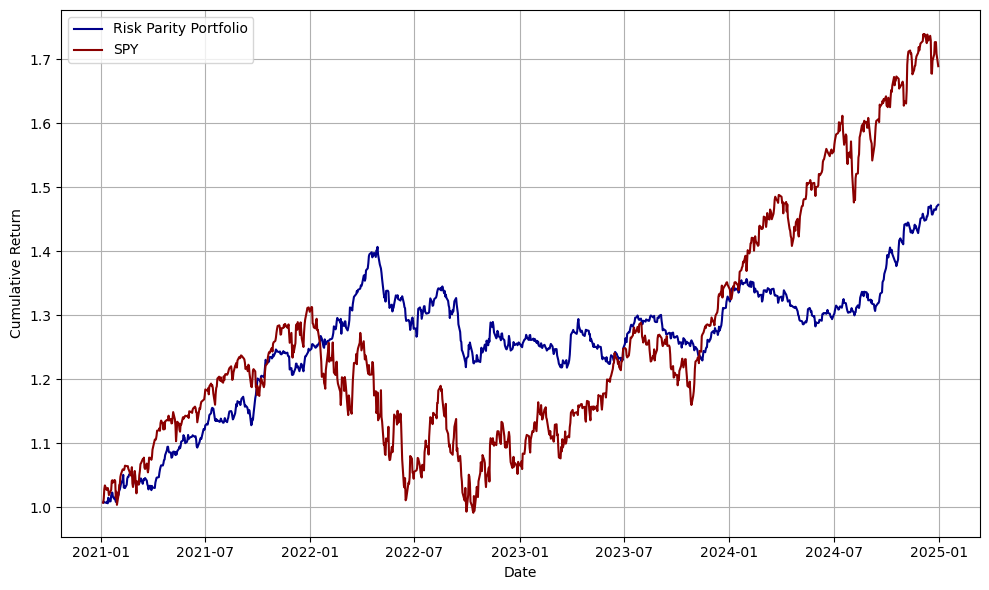

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(risk_parity_cumulative_returns, label="Risk Parity Portfolio", color='darkblue')
plt.plot(spy_cumulative_returns, label="SPY", color='darkred')
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()